In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import pickle
import time as t
import matplotlib as mpl
import matplotlib.pyplot as plt
import anndata as ad
import os

from FORECASTS import *

C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
pd.options.mode.chained_assignment = None

In [3]:
with open('Genesets/senmayo.pkl', 'rb') as f:
    senmayo = pickle.load(f)

with open('Genesets/fridman.pkl', 'rb') as f:
    fridman = pickle.load(f)

with open('Genesets/sasp_factors.pkl', 'rb') as f:
    sasp_factors = pickle.load(f)

In [4]:
clf = FORECASTS()

C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Kasmani

In [8]:
%%capture --no-display

folders = os.listdir('Old/Old Datasets/kasmani')
dfs = {}
As = {}

for i, fldr in enumerate(folders):
    h5_name = [x for x in os.listdir(f'Old/Old Datasets/kasmani/{fldr}') if x[-3:] == '.h5'][0]
    h5_dir = 'Old/Old Datasets/kasmani/' + folders[i]

    #adata = ad.read_h5ad(h5_dir)
    A = sq.read.visium(h5_dir)
    df = A.to_df()
    conv_dict = {}
    for gene_name in df.columns:
        conv_dict.update({gene_name : gene_name.upper()})
    df.rename(conv_dict, axis = 1, inplace = True)
    
    dfs.update({fldr : df})
    As.update({fldr : A})
    

In [9]:
for df_id in dfs:
    As[df_id].obs['probs'] = clf.classify(dfs[df_id], n_jobs = 8, normalized = False, logarithmized = False)
    As[df_id].obs['preds'] = [int(x > 0.584) for x in As[df_id].obs['probs']]

Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Pre-processing complete in 6.68 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.38 seconds.
Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Pre-processing complete in 6.16 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.28 seconds.
Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Pre-processing complete in 7.59 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 100.0%.
Modelling complete in 4.39 seconds.
Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Pre-processing complete in 7.48 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.19 seconds.
Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


Pre-processing complete in 8.45 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.44 seconds.
Pre-processing...


C:\Users\s4637482\AppData\Local\anaconda3\envs\bioinf_env\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Pre-processing complete in 8.30 seconds.
12434 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.32 seconds.


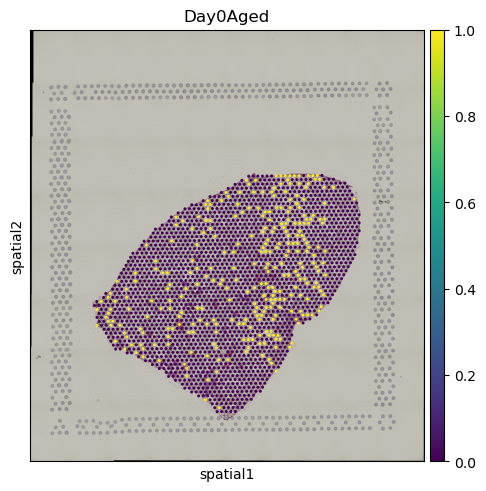

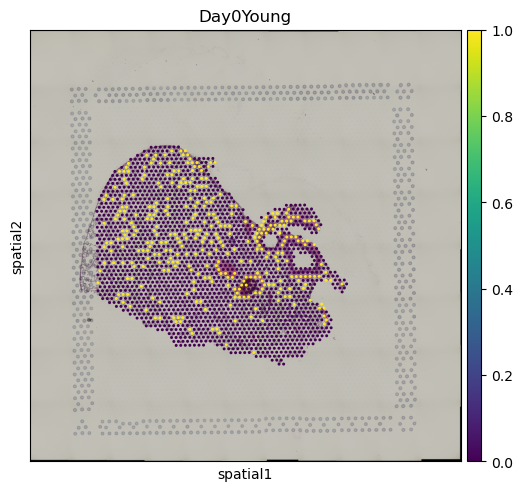

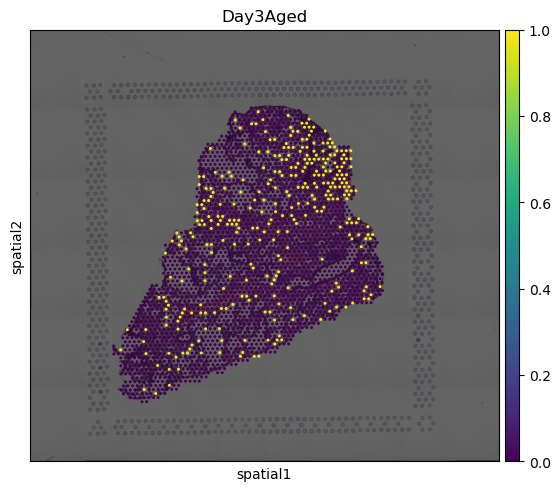

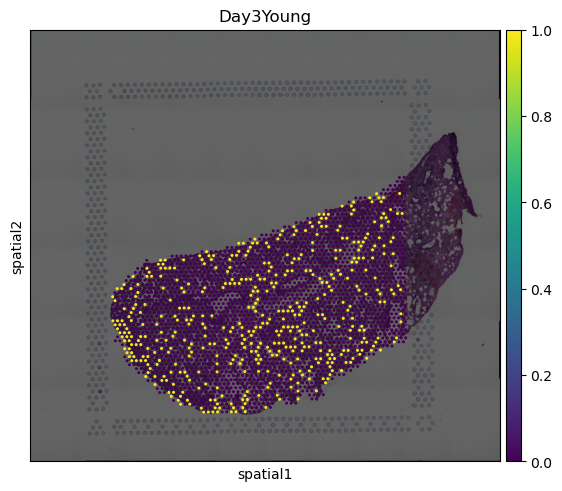

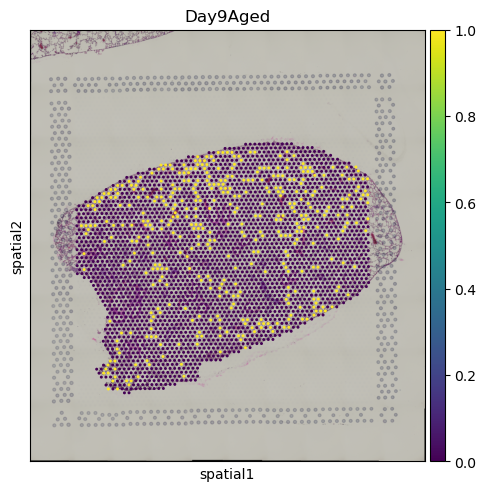

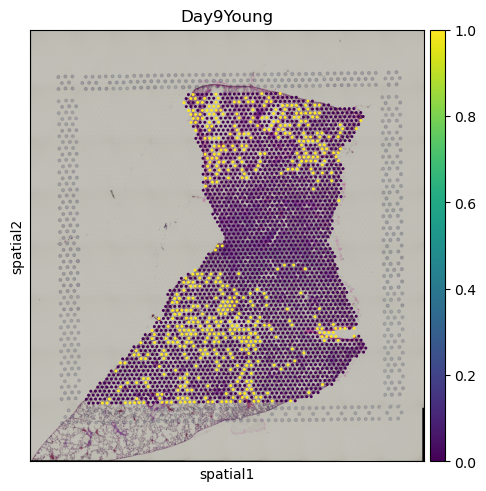

In [12]:
for id in As:
    sq.pl.spatial_scatter(
        As[id],
        shape = 'circle',
        color = 'preds',
        title = id,
        save = f'kasmani/{id}'
    )

## Nikopoulou

In [21]:
adatas = []

for d_id in ['old1', 'old2', 'young1', 'young2']:
    df = pd.read_csv(f'Old/Old Datasets/nikopoulou/{d_id}/{d_id}_raw_counts_spatial.csv', index_col = 'Unnamed: 0').T
    df = df.drop_duplicates()
    conv_dict = {}
    for gene_name in df.columns:
        conv_dict.update({gene_name : gene_name.upper()})

    df.rename(conv_dict, axis = 1, inplace = True)

    adata = ad.AnnData(X = df)
    adata.obs['raw_counts'] = adata.X.sum(axis = 1)

    sc.pp.normalize_total(adata, exclude_highly_expressed = True)
    sc.pp.log1p(adata)
    
    adata.obs['probs'] = clf.classify(adata, n_jobs = 8, normalized = True, logarithmized = True)
    adata.obs['preds'] = [x > 0.584 for x in adata.obs['probs']]
    print(d_id)
    print(f"{sum(adata.obs['preds']) / adata.shape[0]}% voxels sen+")
    print(f"{sum(adata.obs[adata.obs['preds'] == 1]['raw_counts']) / sum(adata.obs['raw_counts'])}% cell sen+")
    print()

    adatas.append(adata)

Pre-processing...
Pre-processing complete in 3.52 seconds.
10219 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 100.0%.
Modelling complete in 4.23 seconds.
old1
0.043682795698924734% voxels sen+
0.04425380652288337% cell sen+

Pre-processing...
Pre-processing complete in 3.89 seconds.
10549 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 100.0%.
Modelling complete in 4.11 seconds.
old2
0.11159263271939328% voxels sen+
0.10850838172404656% cell sen+

Pre-processing...
Pre-processing complete in 3.42 seconds.
10227 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 100.0%.
Modelling complete in 4.43 seconds.
young1
0.043859649122807015% voxels sen+
0.04540855211662588% cell sen+

Pre-processing...
Pre-processing complete in 2.02 seconds.
9886 genes in model
Modelling...
Model accuracy on hold-out scRNA-seq dataset of 98.75%.
Modelling complete in 4.25 seconds.
young2
0.09236234458259325% voxels sen+
0.09385